# Lithospheric Strength
```{index} Lithospheric Strength
```

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## What is it?
Lithospheric strength is controlled by rheology, which depends on temperature, composition and presence of volatiles (e.g. water). These features interact to control the strength of the lithosphere. The lithosphere can deform by brittle and ductile deformation. The deformation processes have their own yield strengths, beyond which their deformation is non-elastic.



## Brittle Yield Strength
The brittle yield strength is assumed to be related to pressure (depth) in the crust. It is independent of strain rate, temperature and composition. For oceanic lithosphere we can use Anderson’s theory of faulting to express the dip of a fault in terms of the coefficient of friction. 

The tectonic stress required to cause faulting under $\textbf{tension}$ is:

$${\Delta}{\sigma}_{xx}=\frac{-2f_{s}({\rho}gy-p_{w})}{(1+f_{s}^{2})^{\frac{1}{2}}+f_{s}}$$

The tectonic stress required to cause faulting under $\textbf{compression}$ is:

$${\Delta}{\sigma}_{xx}=\frac{2f_{s}({\rho}gy-p_{w})}{(1+f_{s}^{2})^{\frac{1}{2}}-f_{s}}$$

where ${\sigma}_{xx}$ is the deviatoric stress (i.e. non-hydrostatic stress; related to shape change), $f_{s}$ is the static component of friction, ${\rho}gy$ is the lithostatic stress (${\rho}$ = 3.3 g/cm3, $y$ = depth), and $p_{w}$ is the pore pressure. To find the failure stress of the brittle part of the lithosphere (e.g. the crust) we assume that the pore pressure is hydrostatic, so $p_{w}={\rho}gy$ and $f_{s}$ = 0.6.

### Practice 1
Use these equations to sketch strength profiles of oceanic lithosphere to a depth of 40 km.
Are rocks more prone to failure under tension or compression?

In [7]:
f_s = 0.6
rho = 3300           # mantle density
rho_w = 1015
alen = 40000         # depth range, m
dy = 200             # depth sampling, m
y = np.zeros(alen)
g = 9.81

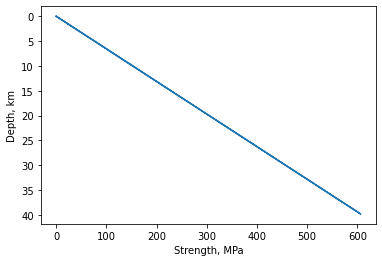

In [10]:
# Calculate the stress profile over depth for tension. Note that  𝑝𝑤  depends on depth.
sigmat = np.zeros(alen)
pw = np.zeros(alen)

for i in range (0, -alen, -dy) :
  y[i] = np.real(i)
  pw[i] = rho_w * g * y[i]
  sigmat[i] = (-2. * f_s * ((rho * g * y[i]) - pw[i])) / ((1. + f_s**2.)**0.5 + f_s) # tension strength
  
plt.plot(sigmat/1e6, -1*y/1000)
plt.gca().invert_yaxis()
plt.ylabel('Depth, km')
plt.xlabel('Strength, MPa')
plt.show()

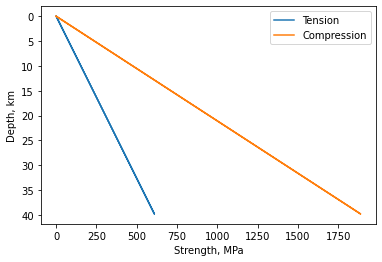

What we can see is that the failure stress under tension is lower at any depth therefore rocks are always easier to break in tension.


In [18]:
# Calculate the stress profile over depth for compression. You shouldn't need to recalculate  𝑝𝑤 .
sigmac = np.zeros(alen)

for i in range (0, -alen, -dy) :
  pw[i] = rho_w * g * y[i]
  sigmac[i] = (-2. * f_s * ((rho * g * y[i]) - pw[i])) / ((1. + f_s**2.)**0.5 - f_s) # compression strength

plt.plot(sigmat/1e6, -1*y/1000, label="Tension")
plt.plot(sigmac/1e6, -1*y/1000, label="Compression")
plt.gca().invert_yaxis()
plt.ylabel('Depth, km')
plt.xlabel('Strength, MPa')
plt.legend()
plt.show()

print("What we can see is that the failure stress under tension is lower at any depth therefore rocks are always easier to break in tension.")

## Yield Strength
Yield strength is the deformation changes from elastic to plastic. Brittle yield strength is related to pressure (depth) e.g. stress for faulting under tension. Ductile yield strength is dependent on strain rate, temperature, composition, dislocation creep and glide. Brittle and ductile strengths can be equal in some places which leads to the brittle ductile transition. Yield strength of lithosphere is the minimum of yield strength for brittle failure or ductile creep.

Power-law creep as a function of temperature can be expressed as:

$$\dot{\epsilon}=A{\sigma}^{n}\:{\exp}(\frac{-E_{a}}{RT})$$

For olivine (i.e. mantle rocks) $A$ = 4.2 × 10^5 MPa−3 s−1, $E_{a}$ is the activation energy = 523 kJ/mol, and $n$ = 3. $R$ is the universal gas constant (8.314510 J mole−1 K−1).


### Practice 2
How far into the lithosphere does the Anderson theory extend? Taking strain rates of 10^−12 /s and 10^−14 /s calculate stress as a function of depth for a geothermal gradient of 25 K/km. At what depth and temperature does the strength of the lithosphere begin to depend on creep stresses? By integrating under strength curves we can estimate total tensional or compressional forces that oceanic lithosphere can support. Can ridge push forces be translated through oceanic lithosphere? Label the the brittle—ductile transition and plastic flow regimes on your strength curves. Where is the Moho? How might the strength profiles of continental lithosphere differ from those in the oceans (hint: consider the distribution of radiogenic elements)?

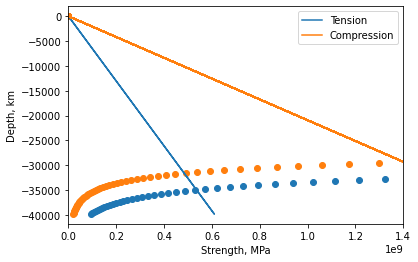

Brittle-ductile transition at ∼30 km.


In [20]:
fs = 0.6          # friction coefficient
rho = 3300.        # density of lithosphere, kg/m**3.
g = 9.8         # gravitational acceleration, m/s**2
rhow = 1000.       # density of water, kg/m**3.

#A = 4.2e-15 # MPa**-3 s**-1 - does this need to be made into Pa?
A = 4.2e-15 # MPa**-3 s**-1 - does this need to be made into Pa?

#A = A * 1e6
Ea = 523.          # activation energy, kJ / mole
#Ea = 900.
Ea = Ea * 1000    # joules / mole
R = 8.3144         # universal gas constant J /mole /K
n = 3              # creep power law exponent 
doteps = 10.**-12  # strain rate /s 

dtemp = 25.0 / 1000.       # geothermal gradient K/m

alen = 40000         # depth range, m
dy = 200             # depth sampling, m
y = np.zeros(alen)
temp = np.zeros(alen)
sigmat = np.zeros(alen)
sigmac = np.zeros(alen)
sigma = np.zeros(alen)
pw = np.zeros(alen)

for i in range (0, -alen, -dy) :
  y[i] = np.real(i)
  
  pw[i] = rhow * g * y[i]
  sigmat[i] = (-2. * fs * ((rho * g * y[i]) - pw[i])) / ((1. + fs**2.)**0.5 + fs) # tension strength
  sigmac[i] = (-2. * fs * ((rho * g * y[i]) - pw[i])) / ((1. + fs**2.)**0.5 - fs) # compression strength
  
  temp[i] = (-1. * np.real(i) * dtemp) + 273.15
  b = (doteps / A) ** (1./n)
  sigma[i] = b * np.exp(Ea / (n * R * temp[i]))

  #print(sigma[i])
    
plt.plot(sigmat, y, label="Tension")
plt.plot(sigmac, y, label="Compression")
plt.scatter(sigma, y)
plt.xlim(0,1400e6)
plt.ylabel('Depth, km')
plt.xlabel('Strength, MPa')



doteps = 10.**-14  # strain rate /s 
y = np.zeros(alen)
temp = np.zeros(alen)
sigmat = np.zeros(alen)
sigmac = np.zeros(alen)
sigma = np.zeros(alen)
pw = np.zeros(alen)

for i in range (0, -alen, -dy) :
  y[i] = np.real(i)
  
  pw[i] = rhow * g * y[i]
  sigmat[i] = (-2. * fs * ((rho * g * y[i]) - pw[i])) / ((1. + fs**2.)**0.5 + fs) # tension strength
  sigmac[i] = (-2. * fs * ((rho * g * y[i]) - pw[i])) / ((1. + fs**2.)**0.5 - fs) # compression strength
  
  temp[i] = (-1. * np.real(i) * dtemp) + 273.15
  b = (doteps / A) ** (1./n)
  sigma[i] = b * np.exp(Ea / (n * R * temp[i]))


plt.scatter(sigma,y)
plt.legend()
plt.show()

print("Brittle-ductile transition at ∼30 km.")

Brittle–ductile transition is at crossover between brittle yield envelope (solid lines) and creep envelope (dashed lines). Note that the Moho is only at 7.1 km depth in this example (in the brittle failure regime). Maximum strength is at 30 km. The total compressional force that can be transmitted by oceanic lithosphere is the area under the curve and is approximately 2.2 x 10^13 N/m. Total tensional force that can be transmitted is about 8 x 10^12 N/m. In Practice 1 Ridge Push and Slab Pull, we estimated a ridge push force of 2.3 x 10^12 N/m and subduction pull as 2.5 x 10^13 N/m. So ridge push forces can be translated through old oceanic lithosphere.

### Reference
2019 notes and practical from Lecture 1 of the module ESE 60028 Continental Tectonics.